**Разведовательный анализ данных и статистические гипотезы**

1. Проведем первичный анализ данных    (изучение данных, заполнение пропусков)
2. Построим графики для общего понимания о данных
3. Проверим данные на нормальность распределения
4. Выдвинем стат. гипотезу и проверим ее


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Посмотрим на то, как выглядит наш датасет

In [ ]:
df = pd.read_csv('drive/MyDrive/howpop_train.csv')
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


In [ ]:
df.describe()

,post_id,content_len,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
count,134137.000000,134137.000000,134137.000000,134137.000000,1.341370e+05,133566.000000,133566.000000,134137.000000,134137.000000,134137.000000
mean,181307.054265,7516.929699,39.625994,71.999866,1.663101e+04,35.536888,8.050035,0.004849,0.003402,-0.003675
std,81766.350702,8724.771640,62.398958,145.854135,3.147982e+04,42.461073,11.398282,1.002158,1.002778,1.005259
min,18284.000000,1.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000,-6.615254,-4.137662,-4.161967
25%,115565.000000,2179.000000,7.000000,8.000000,2.100000e+03,11.000000,2.000000,-0.706552,-0.695780,-0.633775
50%,182666.000000,4949.000000,19.000000,27.000000,7.600000e+03,22.000000,5.000000,-0.020934,0.007022,0.072082
75%,257401.000000,9858.000000,48.000000,78.000000,1.870000e+04,45.000000,10.000000,0.682689,0.708778,0.697072
max,314088.000000,352471.000000,2266.000000,8718.000000,1.730000e+06,1466.000000,445.000000,5.182821,4.872866,3.900973


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   url               134137 non-null  object 
 1   domain            134137 non-null  object 
 2   post_id           134137 non-null  int64  
 3   published         134137 non-null  object 
 4   author            97657 non-null   object 
 5   flow              97048 non-null   object 
 6   polling           134137 non-null  bool   
 7   content_len       134137 non-null  int64  
 8   title             134137 non-null  object 
 9   comments          134137 non-null  int64  
 10  favs              134137 non-null  int64  
 11  views             134137 non-null  int64  
 12  votes_plus        133566 non-null  float64
 13  votes_minus       133566 non-null  float64
 14  views_lognorm     134137 non-null  float64
 15  favs_lognorm      134137 non-null  float64
 16  comments_lognorm  13

Посмотрим на пропуски

In [ ]:
df.isna().sum()

url                     0
domain                  0
post_id                 0
published               0
author              36480
flow                37089
polling                 0
content_len             0
title                   0
comments                0
favs                    0
views                   0
votes_plus            571
votes_minus           571
views_lognorm           0
favs_lognorm            0
comments_lognorm        0
dtype: int64

Отсутствие автора заменим на неизвестного автора;

Аналогично с флоу;

Голоса заменим медианным значением


In [ ]:
df['author'] = df['author'].fillna('Unknown')
df['flow'] = df['flow'].fillna('Unknown')
df['votes_plus'] = df['votes_plus'].fillna(df['votes_plus'].median())
df['votes_minus'] = df['votes_minus'].fillna(df['votes_minus'].median())

Убедимся, что пропусков не осталось

In [ ]:
df.isna().sum()

url                 0
domain              0
post_id             0
published           0
author              0
flow                0
polling             0
content_len         0
title               0
comments            0
favs                0
views               0
votes_plus          0
votes_minus         0
views_lognorm       0
favs_lognorm        0
comments_lognorm    0
dtype: int64

Посмотрим на типы данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   url               134137 non-null  object 
 1   domain            134137 non-null  object 
 2   post_id           134137 non-null  int64  
 3   published         134137 non-null  object 
 4   author            134137 non-null  object 
 5   flow              134137 non-null  object 
 6   polling           134137 non-null  bool   
 7   content_len       134137 non-null  int64  
 8   title             134137 non-null  object 
 9   comments          134137 non-null  int64  
 10  favs              134137 non-null  int64  
 11  views             134137 non-null  int64  
 12  votes_plus        134137 non-null  float64
 13  votes_minus       134137 non-null  float64
 14  views_lognorm     134137 non-null  float64
 15  favs_lognorm      134137 non-null  float64
 16  comments_lognorm  13

Наверное, придется поработать с датой и временем публикации, приведем их к удобному формату:

In [ ]:
df['published'] = pd.to_datetime(df['published'])

Видим, что тип данных изменился

Остальное оставим как есть

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   url               134137 non-null  object        
 1   domain            134137 non-null  object        
 2   post_id           134137 non-null  int64         
 3   published         134137 non-null  datetime64[ns]
 4   author            134137 non-null  object        
 5   flow              134137 non-null  object        
 6   polling           134137 non-null  bool          
 7   content_len       134137 non-null  int64         
 8   title             134137 non-null  object        
 9   comments          134137 non-null  int64         
 10  favs              134137 non-null  int64         
 11  views             134137 non-null  int64         
 12  votes_plus        134137 non-null  float64       
 13  votes_minus       134137 non-null  float64       
 14  view

Посмотрим, как выглядят даты

In [ ]:
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,Unknown,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


In [ ]:
# количество постов от времени
# количество комментариев/постов от популярности
# распределения времени, комментов


Посмотрим на распределения некоторых полей датасета. А именно, времени публикации, числа комментариев, флоу, и lognorm комментариев

Text(0.5, 1.0, 'Распределение нормализованного log комментариев')

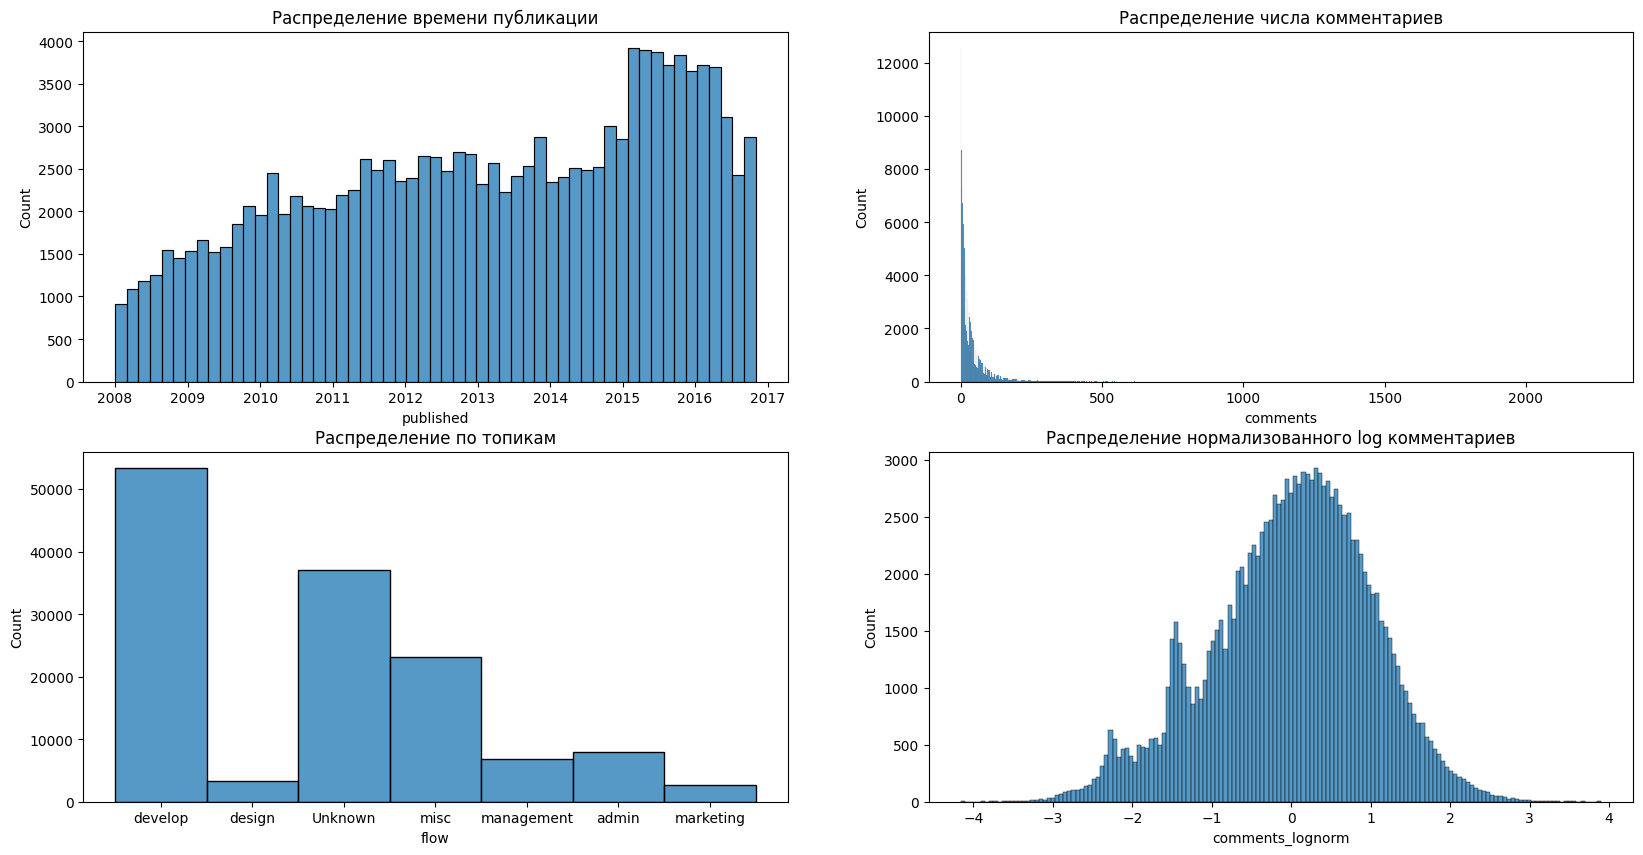

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))

histplot = sns.histplot(df['published'], ax = axes[0][0])
histplot.set_title('Распределение времени публикации')

histplot = sns.histplot(df['comments'], ax = axes[0][1])
histplot.set_title('Распределение числа комментариев')

histplot = sns.histplot(df['flow'], ax = axes[1][0])
histplot.set_title('Распределение по топикам')

histplot = sns.histplot(df['comments_lognorm'], ax = axes[1][1])
histplot.set_title('Распределение нормализованного log комментариев')

По первому графику видим увеличение числа постов с ростом платформы из года в год

По распределению числа комментариев видим огромный но низкий хвост справа - посты с большим количеством комментариев

По флоу видим, что меньше всего статей про дизайн, больше всего про разработку

Распределение нормализованного log комментариев выглядит нормально распределенным, что в дальнейшем будет проверено

Также посмотрим на просмотры, плюсы и минусы

Text(0.5, 1.0, 'Распределение минусов')

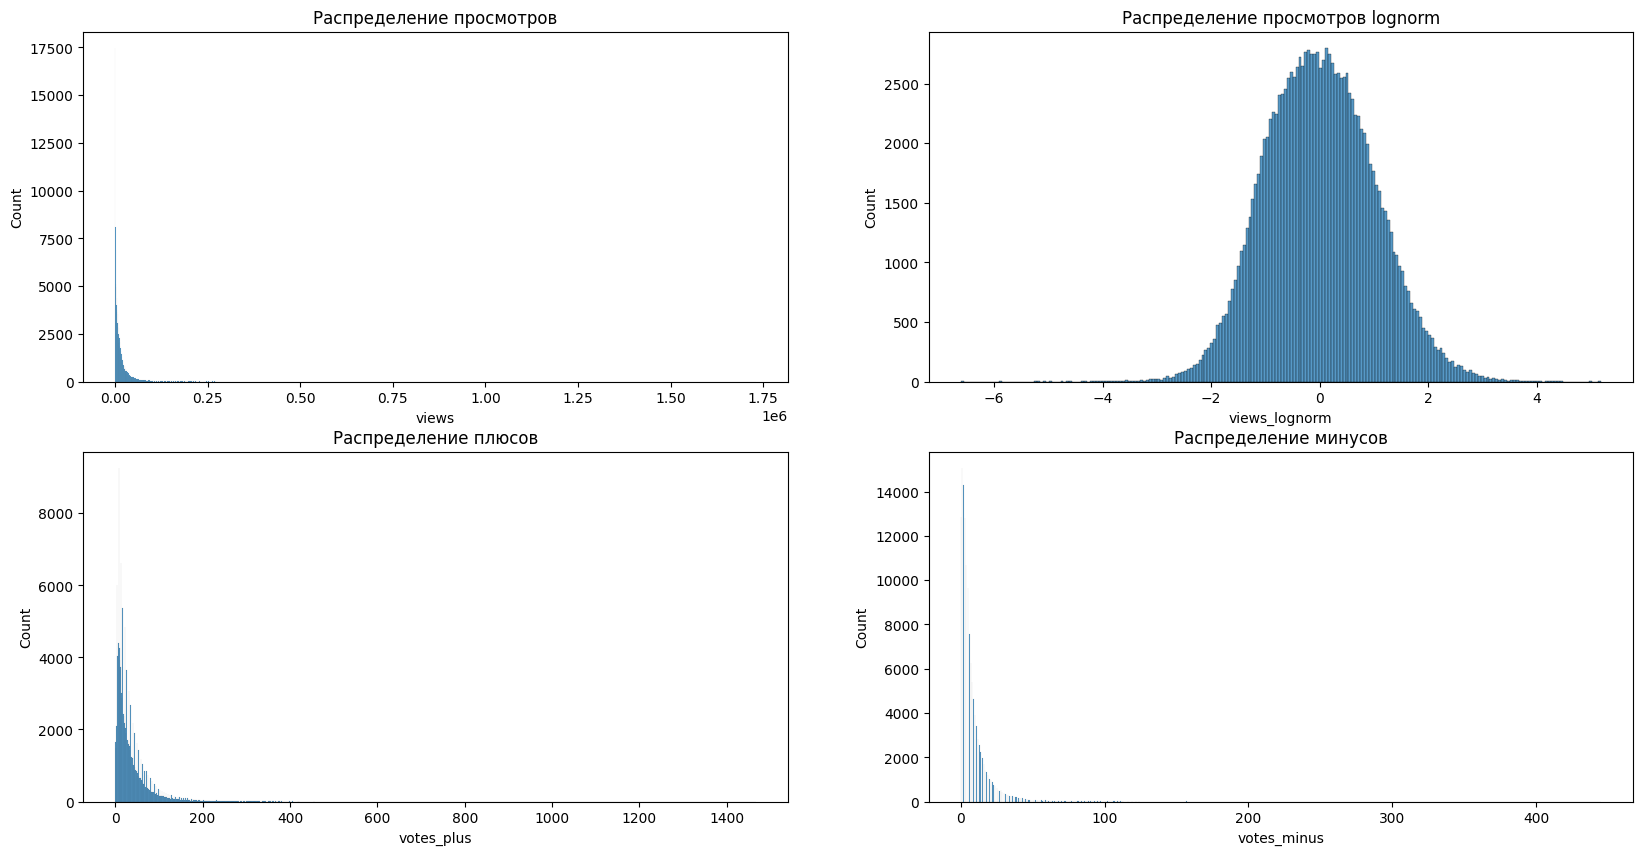

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))

histplot = sns.histplot(df['views'], ax = axes[0][0])
histplot.set_title('Распределение просмотров')

histplot = sns.histplot(df['views_lognorm'], ax = axes[0][1])
histplot.set_title('Распределение просмотров lognorm')

histplot = sns.histplot(df['votes_plus'], ax = axes[1][0])
histplot.set_title('Распределение плюсов')

histplot = sns.histplot(df['votes_minus'], ax = axes[1][1])
histplot.set_title('Распределение минусов')

У распределения просмотров также виден длинный низкий хвост справа - статьи с большим числом просмотров. Распределение просмотров lognorm, очевидно, таким свойством не обладает

Голоса за минус немного прорежены относительно голосов за плюс, не так много минусов на постах

Добавим новые столбцы с датой и часом, чтобы посмотреть на то, как в течение дня распределены посты

In [ ]:
df['date'] = df['published'].dt.date
df['hour'] = df['published'].dt.hour
df.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm,date,hour
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871,2008-01-01,18
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193,2008-01-01,18
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656,2008-01-01,18
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375,2008-01-02,1
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,Unknown,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356,2008-01-02,14


Построим тепловую карту постов в течение дня за 2016 год

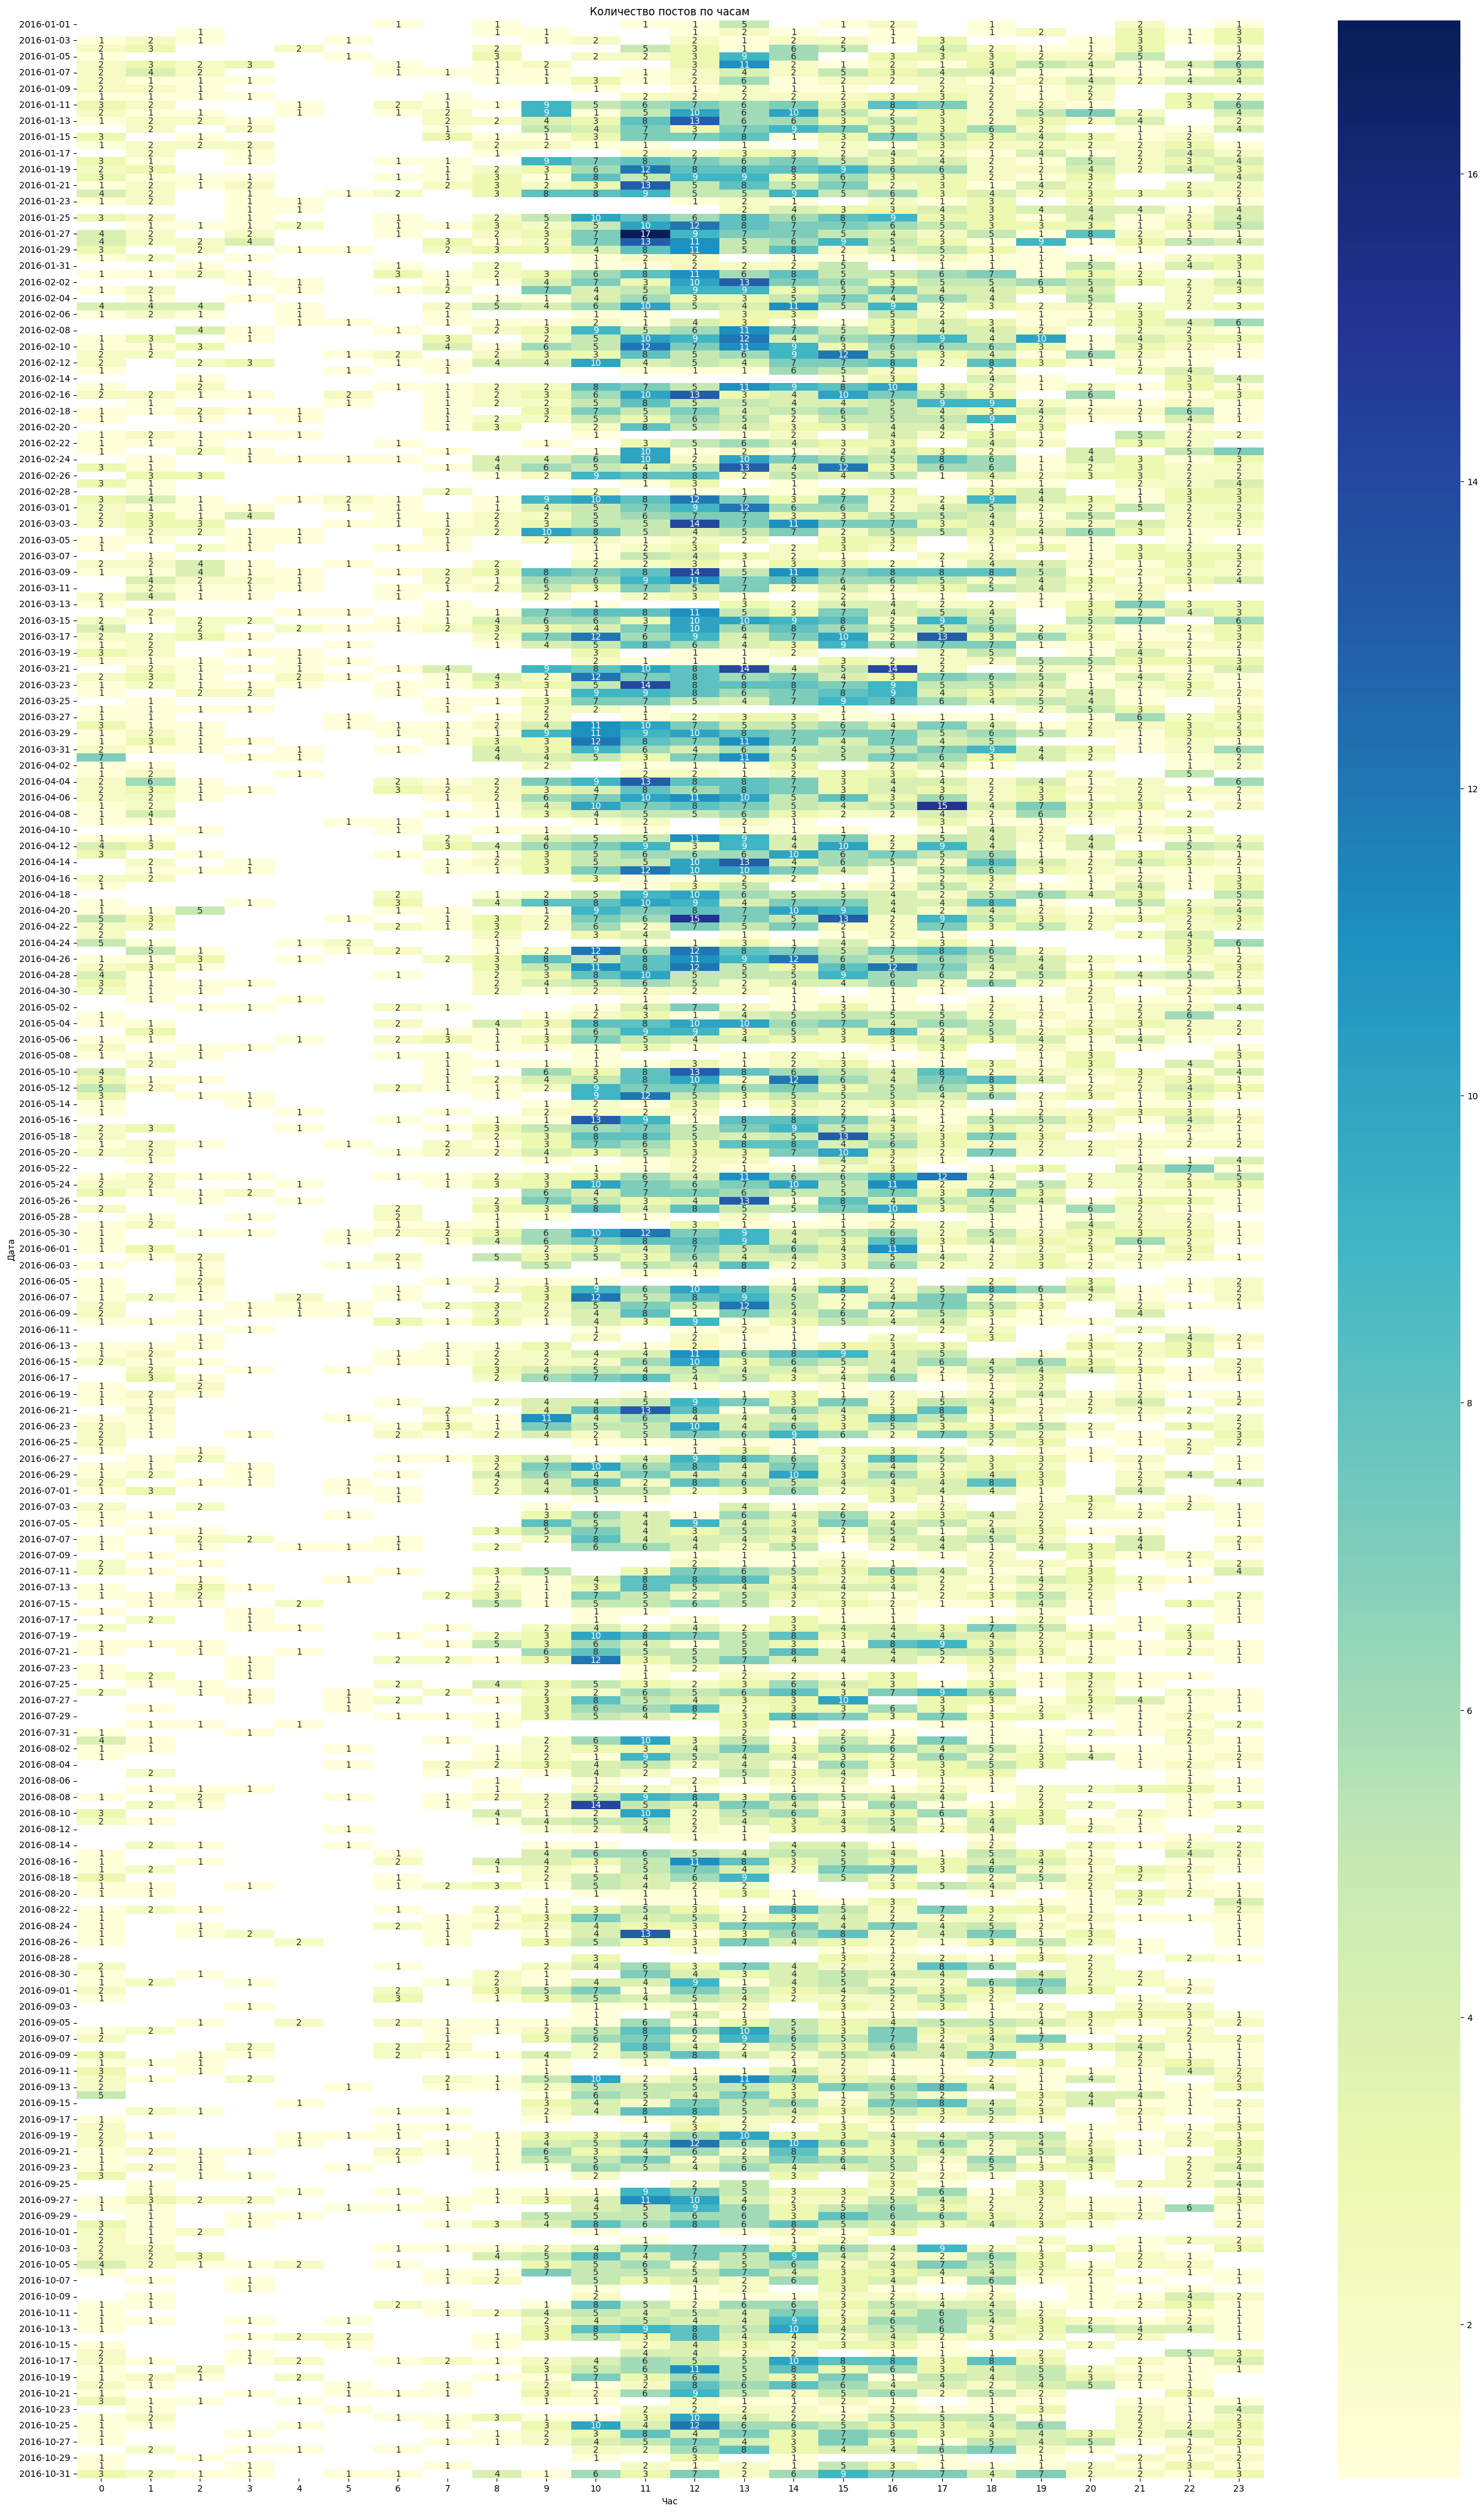

In [ ]:
# фильтруем данные за 2016 год
df1 = df[df['published'].dt.year == 2016]

# группируем данные по дате и часу, считаем количество постов
grouped = df1.groupby(['date', 'hour']).size().reset_index(name='posts_count')

# объединяем с исходным DataFrame df1
df1 = df1.merge(grouped, on=['date', 'hour'], how='left')

pivot = df1.pivot_table(
    values='posts_count',
    columns='hour',
    index='date'
)
pivot.columns = pivot.columns.astype('string')


plt.figure(figsize=(30, 50))
sns.heatmap(pivot, cmap="YlGnBu", annot=True)
plt.title('Количество постов по часам')
plt.xlabel('Час')
plt.ylabel('Дата')
plt.show()


с 9 до 19 часов постов, ожидаемо, больше всего

Посмотрим на распределения других столбцов

Text(0.5, 1.0, 'Распределение добавления в избранное log')

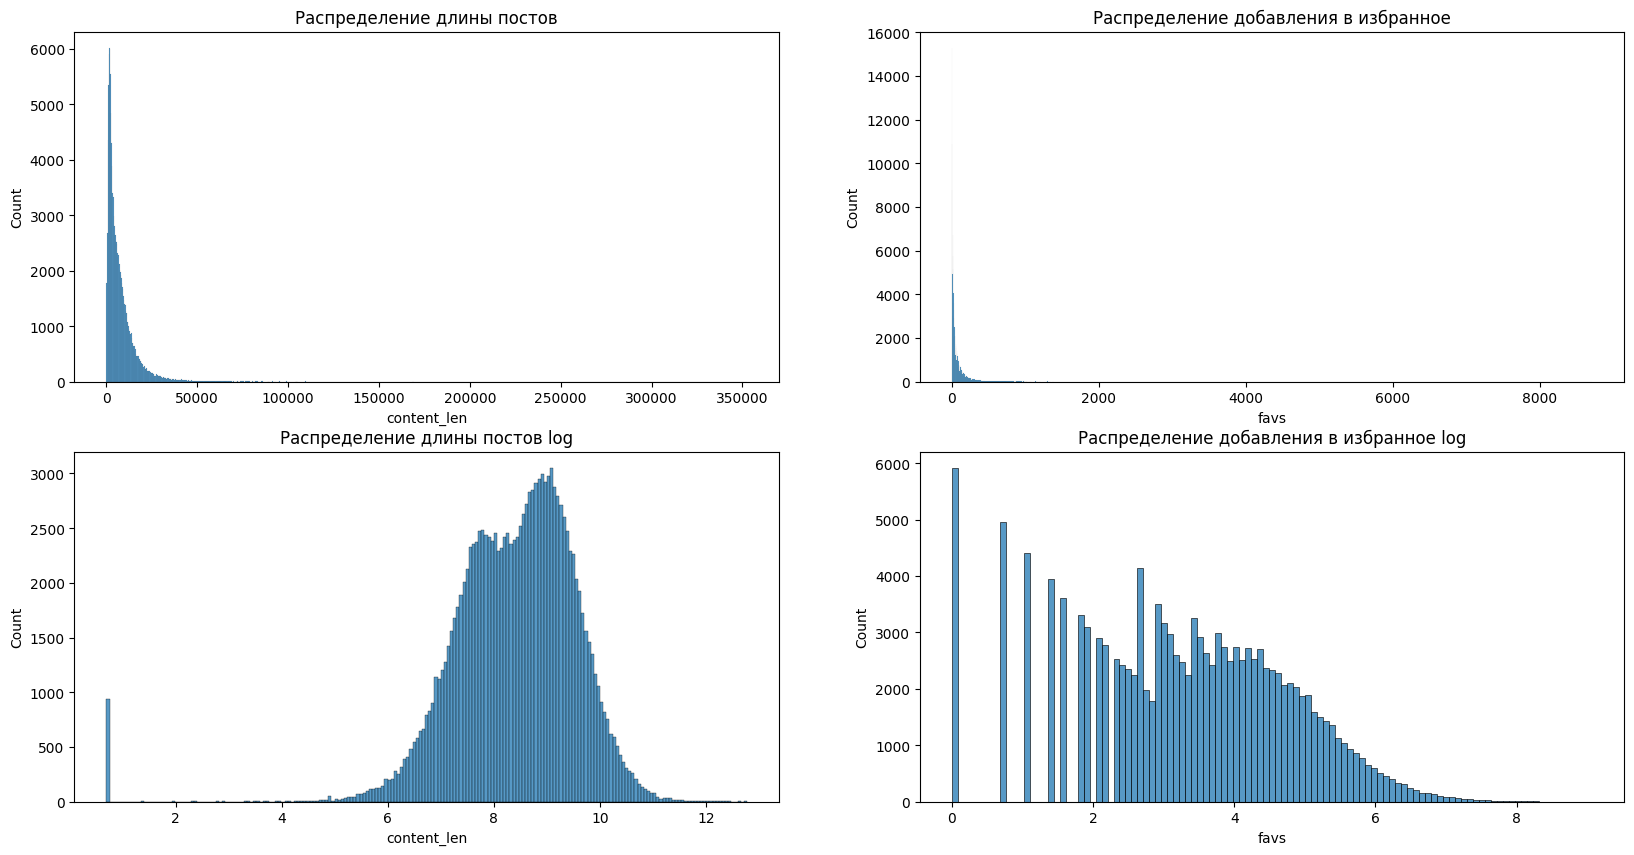

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))

histplot = sns.histplot(df['content_len'], ax = axes[0][0])
histplot.set_title('Распределение длины постов')

histplot = sns.histplot(df['favs'], ax = axes[0][1])
histplot.set_title('Распределение добавления в избранное')

histplot = sns.histplot(np.log(df['content_len']+1), ax = axes[1][0])
histplot.set_title('Распределение длины постов log')

histplot = sns.histplot(np.log(df['favs']+1), ax = axes[1][1])
histplot.set_title('Распределение добавления в избранное log')

Постараемся избавиться от хвоста у распределения длины постов и добавления в избранное логарифмированием

Результат все еще не сильно похож на нормальное распределение, но это проверится

Создадим функцию для удаления выбросов методом z-отклонения

In [ ]:
def outliers_z_score(data, feature, log_scale=False, left = 3, right = 3):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

Применим ее для столбца длины постов

In [ ]:
outliers_len, cleaned_len = outliers_z_score(df, 'content_len', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers_len.shape[0]}')
print(f'Результирующее число записей: {cleaned_len.shape[0]}')

Число выбросов по методу z-отклонения: 1025
Результирующее число записей: 133112


Применим ее для столбца добавления в избранное

In [ ]:
outliers_favs, cleaned_favs = outliers_z_score(df, 'favs', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers_favs.shape[0]}')
print(f'Результирующее число записей: {cleaned_favs.shape[0]}')

Число выбросов по методу z-отклонения: 33
Результирующее число записей: 134104


Посмотрим, какие выбросы были удалены в столбце длины постов

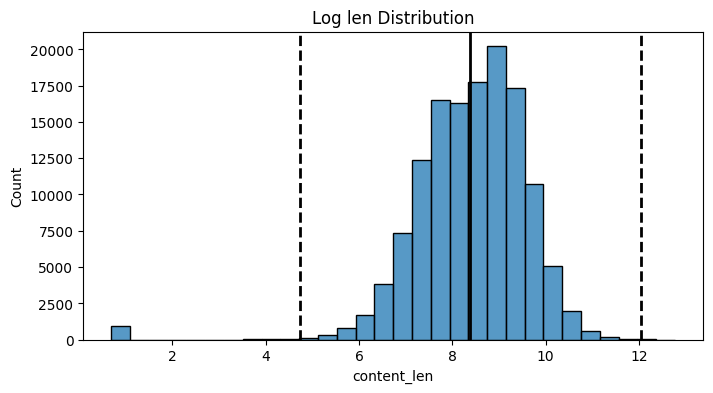

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_len = np.log(df['content_len'] + 1)
histplot = sns.histplot(log_len, bins=30, ax=ax)
histplot.axvline(log_len.mean(), color='k', lw=2)
histplot.axvline(log_len.mean()+ 3 * log_len.std(), color='k', ls='--', lw=2)
histplot.axvline(log_len.mean()- 3 * log_len.std(), color='k', ls='--', lw=2)
histplot.set_title('Log len Distribution');

Посмотрим, какие выбросы были удалены в столбце добавления в избранное

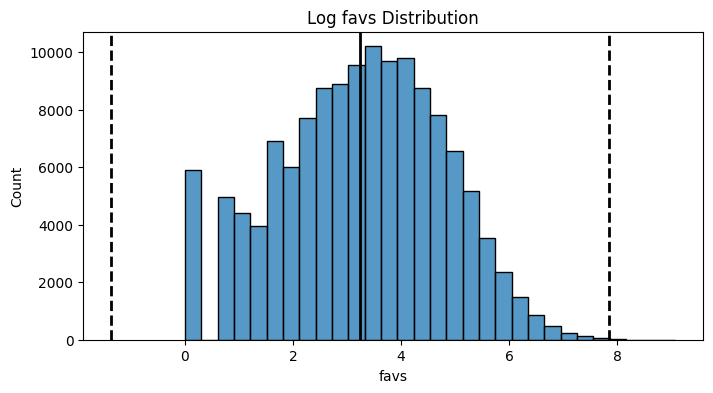

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_f = np.log(df['favs'] + 1)
histplot = sns.histplot(log_f, bins=30, ax=ax)
histplot.axvline(log_f.mean(), color='k', lw=2)
histplot.axvline(log_f.mean()+ 3 * log_f.std(), color='k', ls='--', lw=2)
histplot.axvline(log_f.mean()- 3 * log_f.std(), color='k', ls='--', lw=2)
histplot.set_title('Log favs Distribution');

Посмотрим на изначальные графики еще раз

Text(0.5, 1.0, 'Распределение добавления в избранное 1')

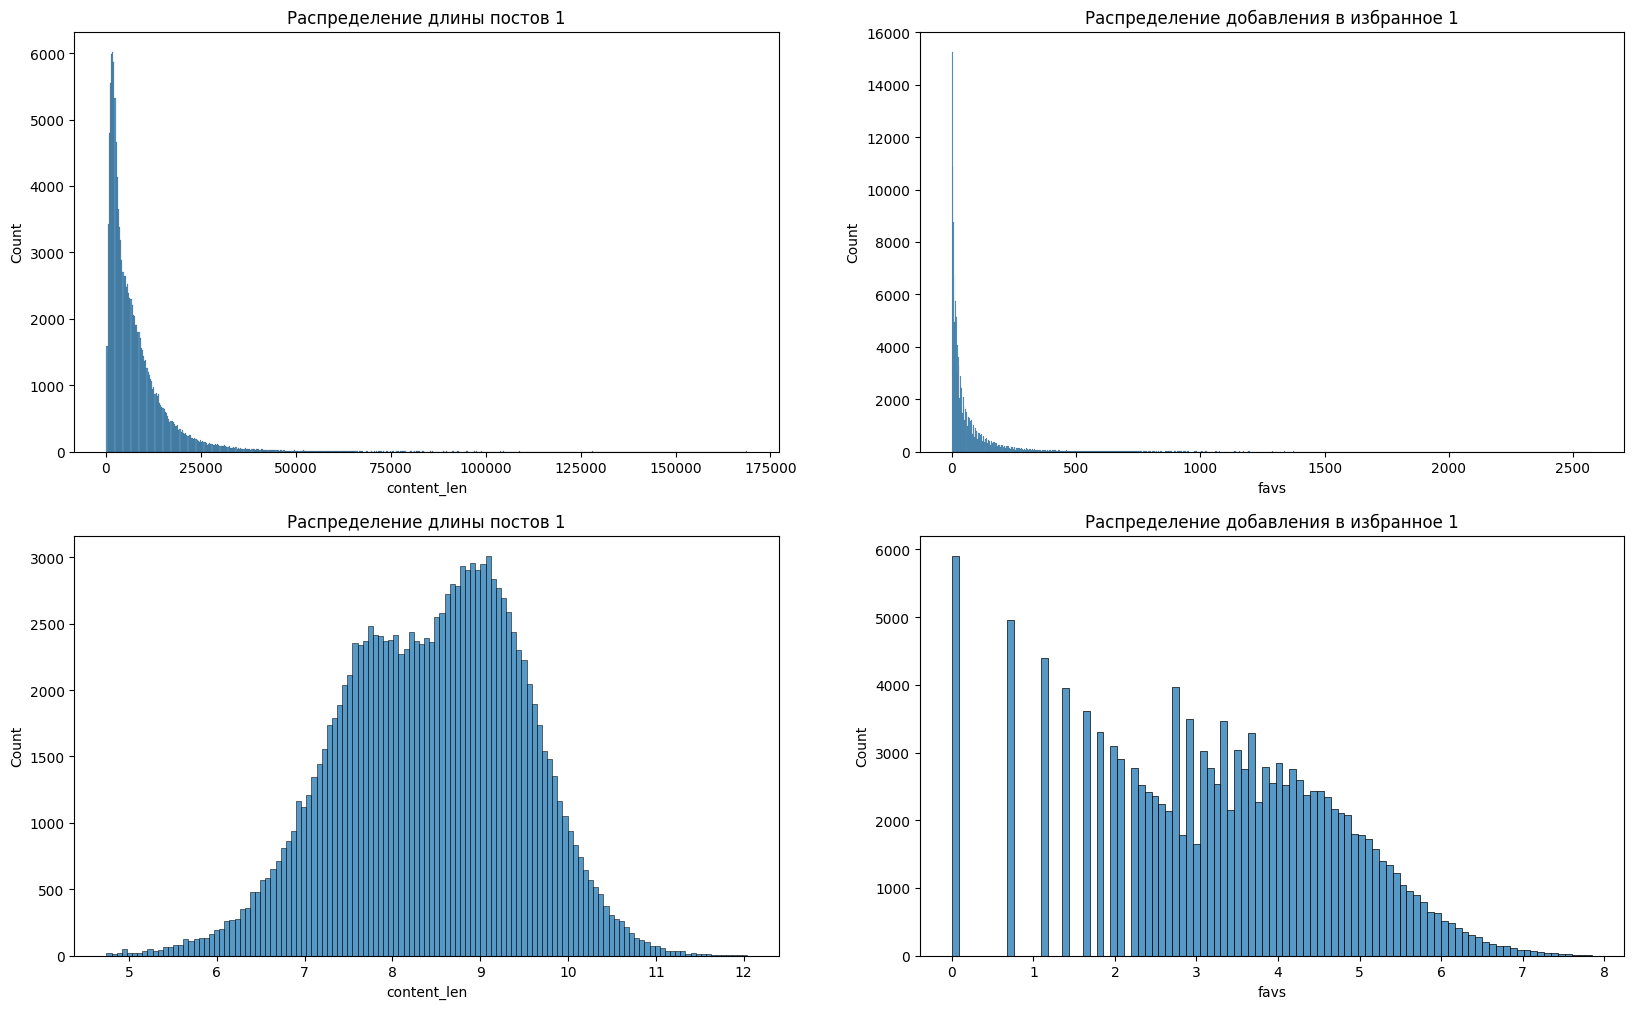

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20,12))

histplot = sns.histplot(cleaned_len['content_len'], ax = axes[0][0])
histplot.set_title('Распределение длины постов 1')

histplot = sns.histplot(cleaned_favs['favs'], ax = axes[0][1])
histplot.set_title('Распределение добавления в избранное 1')

histplot = sns.histplot(np.log(cleaned_len['content_len']+1), ax = axes[1][0])
histplot.set_title('Распределение длины постов 1')

histplot = sns.histplot(np.log(cleaned_favs['favs']+1), ax = axes[1][1])
histplot.set_title('Распределение добавления в избранное 1')

Text(0.5, 1.0, 'Распределение добавления в избранное 1')

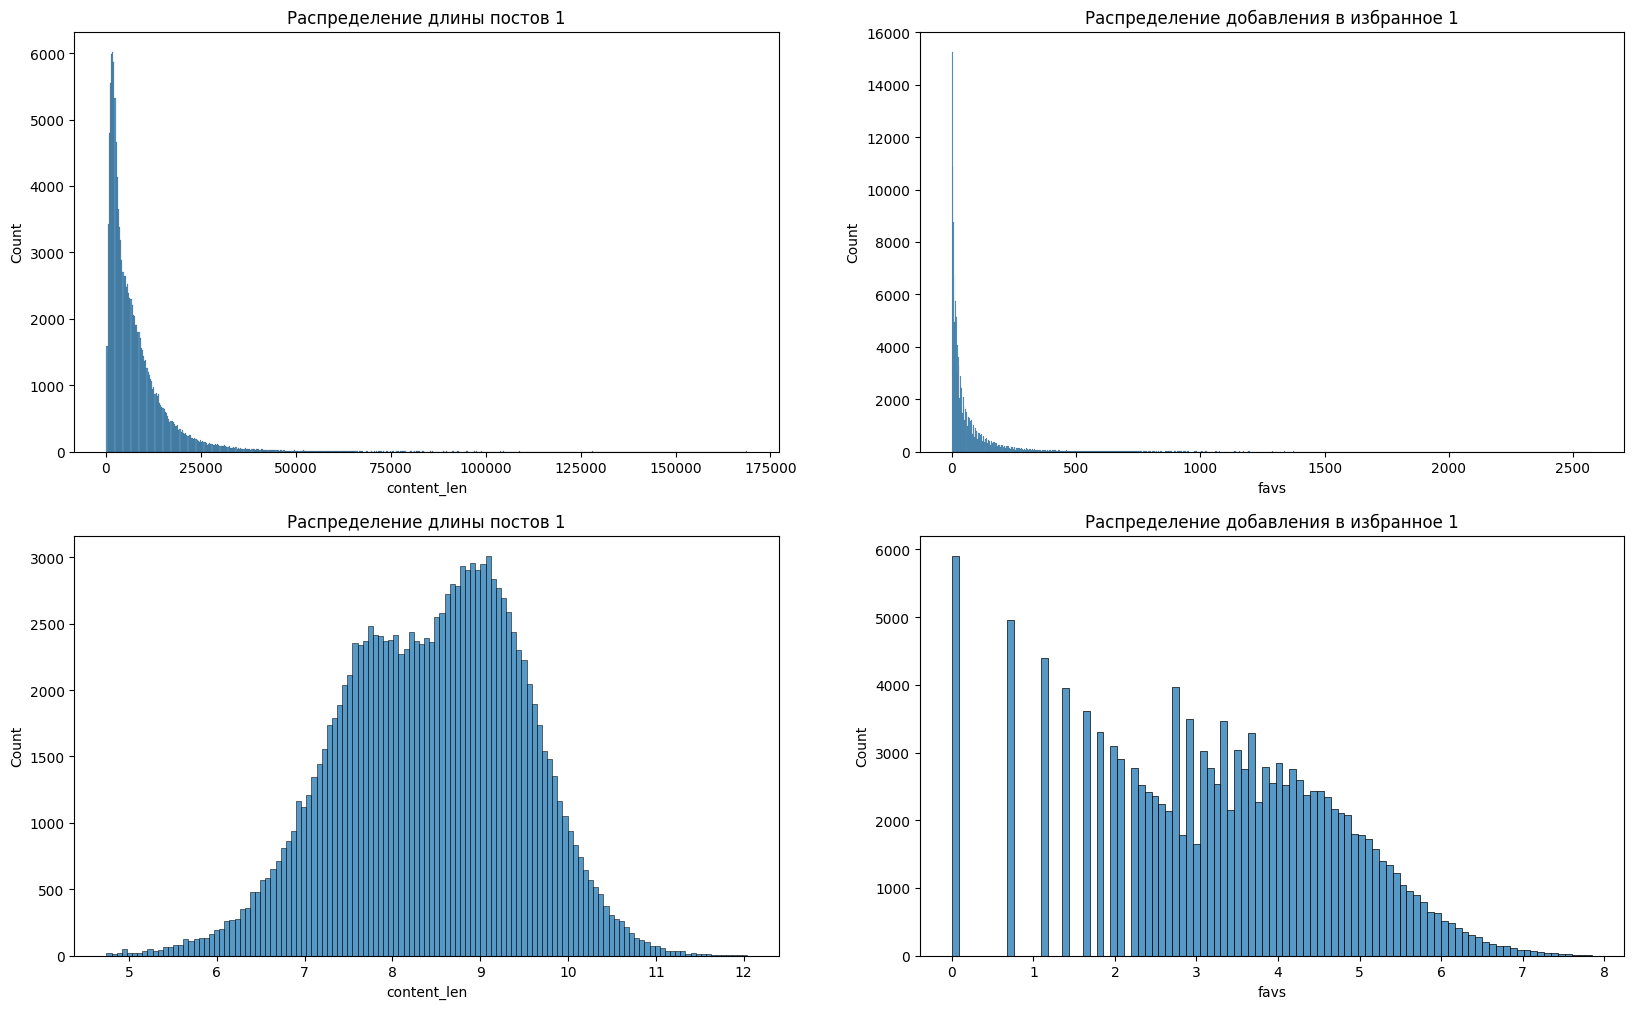

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20,12))

histplot = sns.histplot(cleaned_len['content_len'], ax = axes[0][0])
histplot.set_title('Распределение длины постов 1')

histplot = sns.histplot(cleaned_favs['favs'], ax = axes[0][1])
histplot.set_title('Распределение добавления в избранное 1')

histplot = sns.histplot(np.log(cleaned_len['content_len']+1), ax = axes[1][0])
histplot.set_title('Распределение длины постов 1')

histplot = sns.histplot(np.log(cleaned_favs['favs']+1), ax = axes[1][1])
histplot.set_title('Распределение добавления в избранное 1')

Text(0.5, 1.0, 'Распределение добавления в избранное 1')

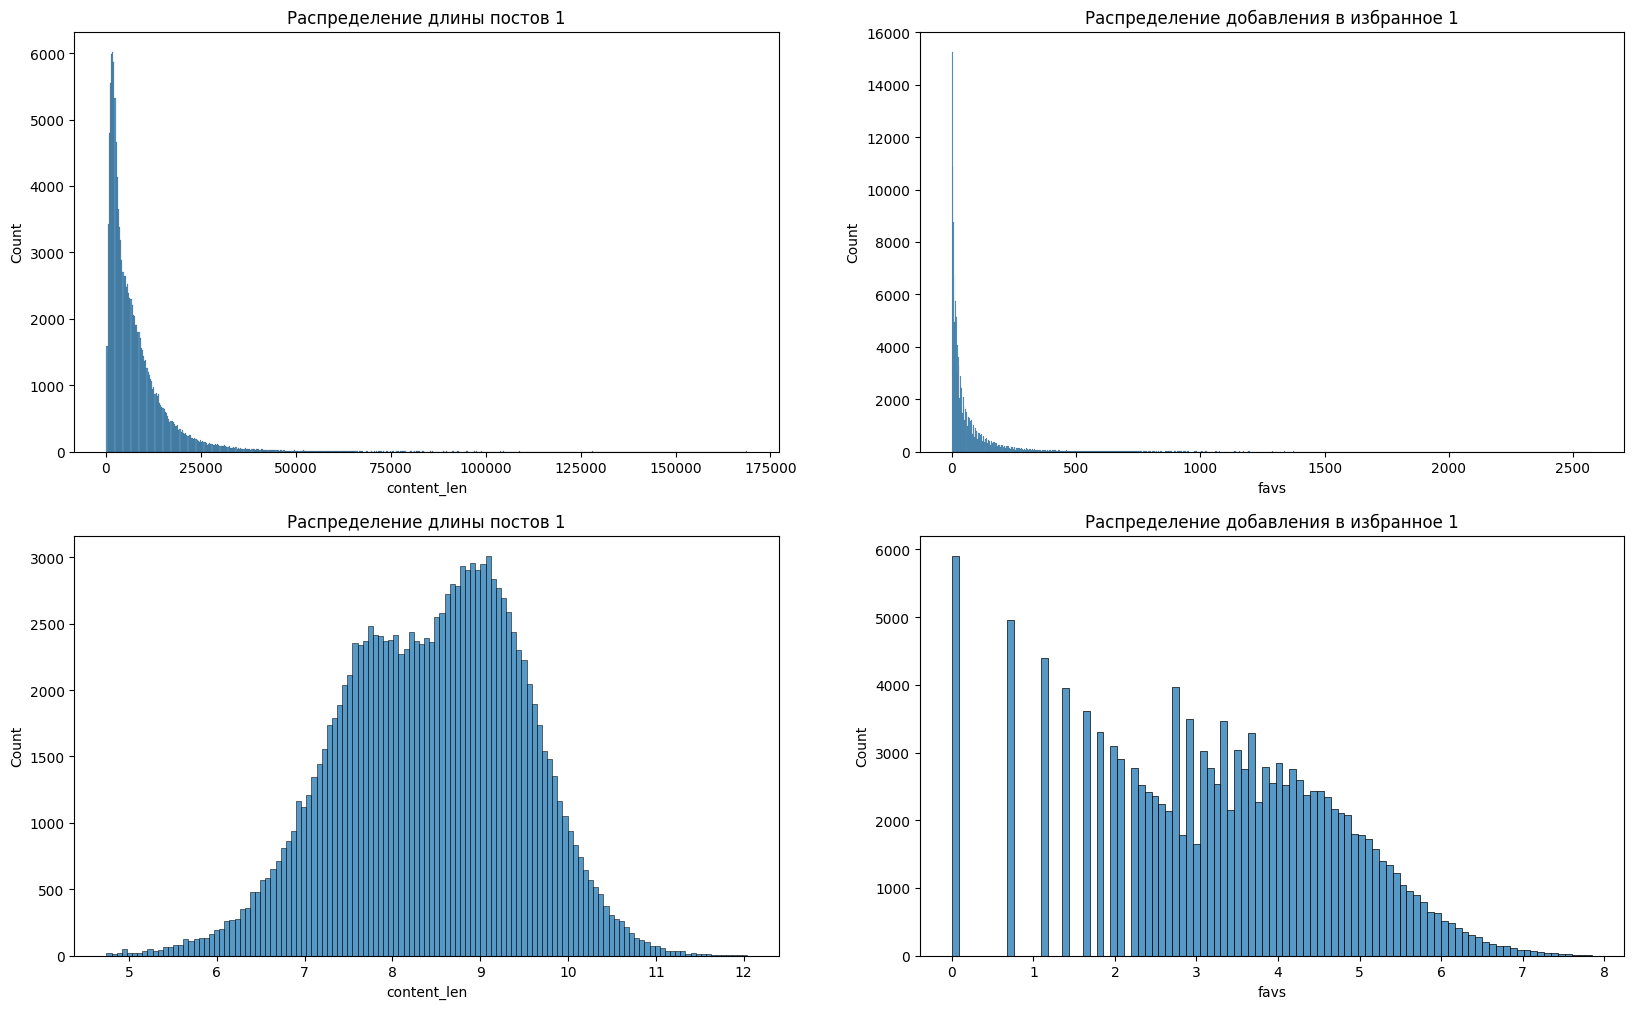

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20,12))

histplot = sns.histplot(cleaned_len['content_len'], ax = axes[0][0])
histplot.set_title('Распределение длины постов 1')

histplot = sns.histplot(cleaned_favs['favs'], ax = axes[0][1])
histplot.set_title('Распределение добавления в избранное 1')

histplot = sns.histplot(np.log(cleaned_len['content_len']+1), ax = axes[1][0])
histplot.set_title('Распределение длины постов 1')

histplot = sns.histplot(np.log(cleaned_favs['favs']+1), ax = axes[1][1])
histplot.set_title('Распределение добавления в избранное 1')

Хвосты стали меньше, но не слишком, что верно, ведь бывают и длинные посты и популярные с большим количеством добавления в избранное

Начнем проверять данные на нормальность: длина постов (очищенная от выбросов)

Проверять будем тестом Д`Агостино, ведь он хорошо работает для больших выборок,
может быть менее чувствительным к мелким отклонениям от нормальности по сравнению с тестом Шапиро-Уилка.


In [ ]:
from scipy.stats import normaltest
alpha = 0.1
H0 = 'норм расп'
Ha = 'не норм расп'
df2 = pd.DataFrame(cleaned_len['content_len'])
_, p = normaltest(df2)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация
if p[0] > alpha/2: #двусторонняя
	print(H0)
else:
	print(Ha)

p=0.000
не норм расп


Ожидаемо, это не нормально распределенные данные

Попробуем прогнать тот же тест, но для логарифма данных, который внешне более похож на нормальное распределение

In [ ]:
from scipy.stats import normaltest
alpha = 0.1
H0 = 'норм расп'
Ha = 'не норм расп'
df2log = pd.DataFrame(np.log(cleaned_len['content_len']+1))
_, p = normaltest(df2log)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация
if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.000
не норм расп


Здесь уже более интересно: данные совсем не похожи на нормальные - p value все еще 0. Видимо, дело в некой скачкообразности данных и асиметрии

Теперь проверим столбец lognorm просмотров тем же тестом по приведенным выше причинам

In [ ]:
check = pd.DataFrame(df['views_lognorm'])

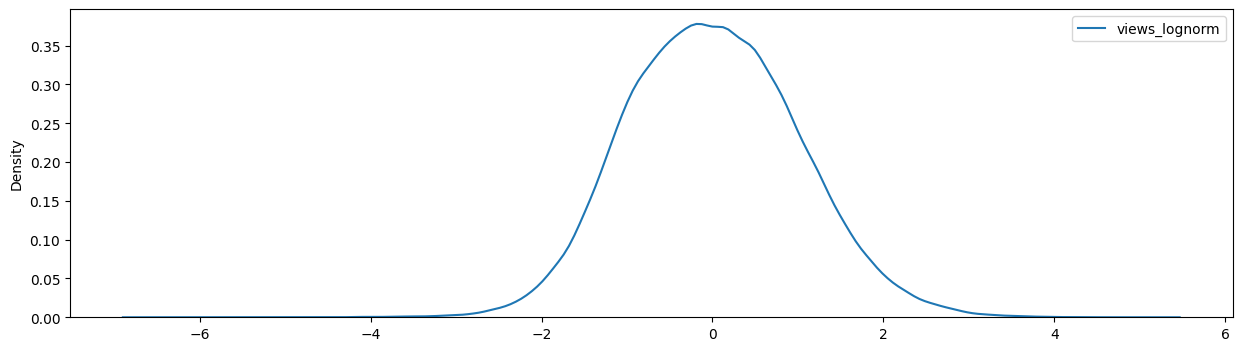

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(15,4))
pl = sns.kdeplot(check, ax=axes)

столбец lognorm просмотров внешне очень похож на нормально распределенный

In [ ]:
_, p = normaltest(check)
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация
if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.000
не норм расп


Однако, таковым не является
Скорее всего та же проблема, что и у столбца длины поста - скачкообразности данных и асиметрии

попробуем удалить выбросы методом мкр и посмотреть, изменится ли что-то

In [ ]:
def outliers_iqr(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

In [ ]:
out, cl = outliers_iqr(df, 'views_lognorm')
cl1 = cl['views_lognorm']

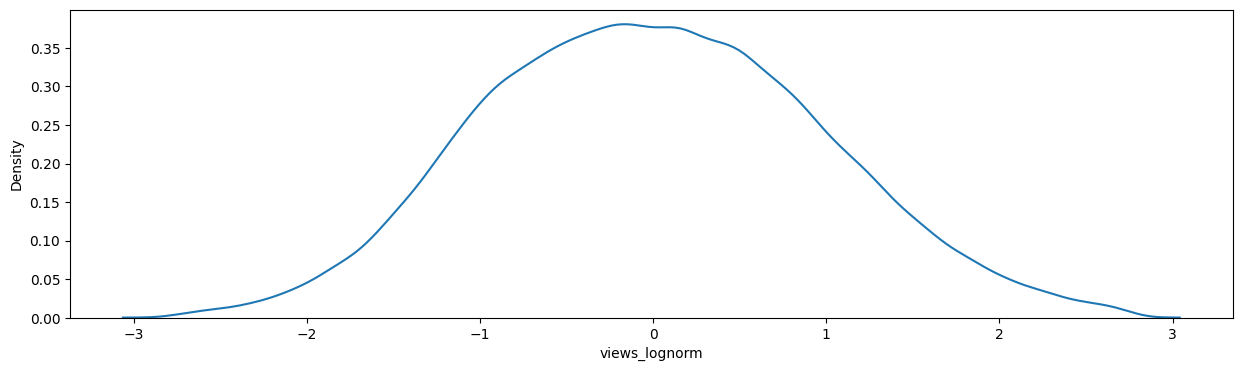

In [ ]:
fig, axes = plt.subplots(1,1,figsize=(15,4))
pl = sns.kdeplot(cl1, ax=axes)

данные выглядят нормально, выбросы убраны

In [ ]:
from scipy.stats import normaltest
_, p = normaltest(pd.DataFrame(cl1))
#normaltest возвращает двустороннюю вероятность для проверки гипотезы

print('p=%.3f' % p[0])

# Интерпретация
if p[0] > alpha/2:
	print(H0)
else:
	print(Ha)

p=0.000
не норм расп


убедились, что дело не выбросах - p val все еще 0

выдвинем гипотезу о свзяи популярности и числа комментариев: чем просмотров больше, тем больше должно быть и коментов

для этого воспользуемся тестом на корреляцию пирсона, так как она используется для численных, а не категориальных переменных

In [ ]:
from scipy.stats import pearsonr

data1 = df['comments']
data2 = df['views']
alpha = 0.05

corr, p = pearsonr(data1, data2)

In [ ]:
print(corr,p)
if p>alpha:
    print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу об отсутсвии зависимости между переменными.")
else:
    print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу об отсутствии зависимости между переменными.")

0.29003508403673306 0.0
0.0 <= 0.05. Мы отвергаем нулевую гипотезу об отсутствии зависимости между переменными.


вывод: данные действительно коррелируют, однако, довольно слабо, что обьясняется тем, что даже у популярных постов может быть не слишком много комментариев, а также тем, что корреляция пирсона учитывает лишь линейную связь переменных

выдвинем гипотезу об пропорции флоу дизайна

проверять ее будем z тестом на пропорцию, ведь этот тест как раз используется для сравнения наблюдаемой пропорции и теоретической\

предположим, что имеется 5% статей о дизайне

In [ ]:
p_0 = 0.05
x = len(df[df['flow'] == 'design'])
n = len(df)

print(n, x)

134137 3320


In [ ]:
3320/134137

0.024750814465807347

видим, что это не так

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

#perform one proportion z-test
_, p = proportions_ztest(count=x, nobs=n, value=p_0)
p

0.0

In [ ]:
if p < 0.05:
    print("Мы отвергаем нулевую гипотезу ")
else:
    print("Мы не можем отвергнуть нулевую гипотезу.")

Мы отвергаем нулевую гипотезу 


что и показал результат теста на пропорцию

In [ ]:
p_0 = 0.025
_, p = proportions_ztest(count=x, nobs=n, value=p_0)
p

0.5569254365327059

In [ ]:
if p < 0.05:
    print("Мы отвергаем нулевую гипотезу ")
else:
    print("Мы не можем отвергнуть нулевую гипотезу.")

Мы не можем отвергнуть нулевую гипотезу.


после уменьшения в 2 раза начального предположенного значения, тест верно показал, что теперь гипотеза близка к правде